<a href="https://colab.research.google.com/github/hadassaholive/hds5210-2023/blob/main/INTEGRATIVE_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

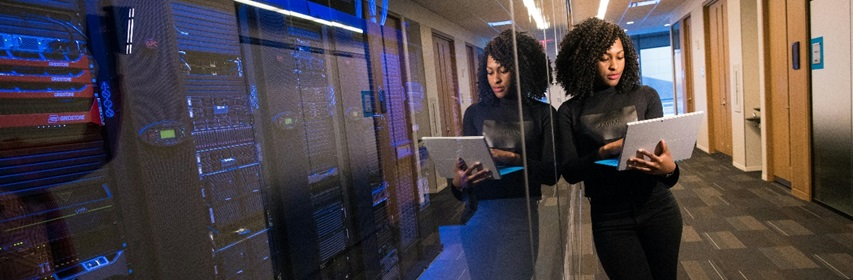

# **Goal**

Build a link with this LLM for extracting knowledge using a Google Colab notebook and HuggingFace. Write prompts to investigate the following:
The specific steps for preparing for a data science interview.
What are the five main questions asked by a recruiter of entry-level data scientists?
Descriptive data scientist profiles for three.

# **Index**

Zero-shot, One-shot, and Few-shot Prompt Engineering using the Llama-2-13B-chat model.
Advanced Prompt Engineering Techniques for extracting data science interview strategies and generating structured data scientist profiles.

### **Explanation:**

The following code is willing to generate responses in text using a pretrained sequence-to-sequence model from the Hugging Face Transformers library (as it is, FLAN-T5) with quantization for saving memory.
Important actions in the code.


***Key Actions in the Code***

**Import Libraries:**. Import AutoTokenizer, AutoModelForSeq2SeqLM, BitsAndBytesConfig and torch for handling devices for model loading, tokenization and quantization.

```
# Imports AutoTokenizer, AutoModelForSeq2SeqLM, and BitsAndBytesConfig
# Imports torch
```



**Configure Quantization:** 8 bits quantization allows runtime-on decrease in memory for better performance even with low-end hardware.

```
# BitsAndBytesConfig(load_in_8bit=True):
```

**Load Model and Tokenizer:** The model (google/flan-t5-base) is loaded with quantization enabled and mapped to available devices (e.g., GPU).


*AutoTokenizer* and *AutoModelForSeq2SeqLM* are used to load the tokenizer and the pretrained FLAN-T5 model. The model is automatically mapped to GPU or CPU (*device_map="auto"*), ensuring compatibility with the hardware.


**Define the Response Generation Function:** *Input Tokenization:* Converts the text prompt into tokenized tensors for model input.



**Generate Response:**
Uses the model's generate method to produce a text response, with decoding parameters like:
* *max_length:* Maximum response length.
* *temperature:* Controls randomness in generation (lower is more deterministic).
* *top_k:* Samples from the top k most likely tokens.
* *top_p:* Uses nucleus sampling, considering the smallest token set with a cumulative probability ≥ top_p.

***Output Decoding:*** Converts the model's output tensor back into a human-readable text string.
Create a Prompt for the Model:


## **2. Prompt Engineering advanced techniques using Llama2-13B.**

BE SURE you change to GPU 4T before running these code.

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose -q 2>/dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 108.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 128.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 269.3 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.28-cp310-cp310-linux_x86_64.whl size=8778733 sha256=96ac8cdb6a0c944da6298db69f87e6e0b7565460557c20136e5e2811618c78c6
  Stored in directory: /tmp/pip-ephem-wheel-cache-masn06l1/wheels/93/6e/a9/478cce089dc2a082bdcffe468a1c65465c91b25d911b30da82
Successfully built llama-cpp-python
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Succ

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.23.2 -q 2>/dev/null

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

In [ ]:
 # Model configuration
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [ ]:
    lcpp_llm = Llama(
        model_path=model_path,
        n_threads=2,
        n_batch=512,
        n_gpu_layers=43,
        n_ctx=4096,
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
def generate_llama_response(user_prompt):

    # System message
    system_message = """
    [INST]<<SYS>> Respond to the user question based on the user prompt<</SYS>>[/INST]
    """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{user_prompt}\n{system_message}"


    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=600,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text



- **max_tokens**: This parameter connotes the maximum number of tokens the model can generate with reference to a prompt. In this case, up to 256 tokens are generated in the output.
- **temperature**: It specifies the controlled randomness of the output. 0 means the answer would be deterministic and as much predictable as possible to minimize variability among responses generated by the system. Lower values lead to more focused than random outputs.
- **top_p**: Also called nucleus sampling, this parameter governs the diversity in the output. A value of 0.95 means the model will consider the smallest set of tokens whose cumulative probability is at least 95%. It encourages diversity by using the best tokens but steers clear of outputs far too predictable.
- **repeat_penalty**: It is the penalty for repeating tokens in the produced reply, so a higher value 1.2will reduce the probability of producing that token and hence make the answer diverse and coherent by avoiding redundancy.
- **top_k**: This parameter refers to the maximum number of tokens to take into consideration when generating output. 50 limits the model into using only the top 50 most likely tokens when it generates output; hence it is a balance between diversity and precision.
- **stop**: This is a list of tokens that signals to the model as to when it must stop to produce further output. Thus, the stop token, in this case, is ['INST'], meaning the model shall stop generating new tokens as soon as it encounters the token "INST" in its response.
- **echo**: It is a flag whether to include prompt text in the output in the final generated output. In this instance, it is False, which means the output only comprises the generated response without reporting back the input.


## **Model Check**

In [ ]:
user_prompt = "top ten steps to prepare effectively for an entry-level data science interview"
response = generate_llama_response(user_prompt)
print(response)

 Sure, I'd be happy to help! Here are my top ten steps to prepare effectively for an entry-level data science interview:

1. Review the fundamentals of statistics and mathematics: Data science is built upon a foundation of statistical and mathematical principles, so it's essential to have a solid understanding of these concepts before diving into more advanced topics. Brush up on your knowledge of probability distributions, hypothesis testing, regression analysis, and linear algebra.
2. Familiarize yourself with popular data science tools and technologies: Many entry-level data science positions will involve working with popular tools like Python, R, SQL, and Tableau. Make sure you have hands-on experience with these tools and can demonstrate your proficiency in using them to analyze and visualize data.
3. Practice machine learning basics: Machine learning is a critical component of data science, so it's important to have a solid understanding of the basic concepts like supervised and 

In [ ]:
user_prompt = " top five questions a recruiter might ask for such a position"
response = generate_llama_response(user_prompt)
print(response)

Llama.generate: prefix-match hit


 Sure, I'd be happy to help! Here are the top five questions a recruiter might ask during an interview for a data scientist position:

1. Can you tell us about your experience with machine learning algorithms and how you have applied them in real-world projects?

Recruiters want to know if you have hands-on experience with machine learning techniques and tools, such as scikit-learn, TensorFlow, or PyTorch. They may ask for specific examples of projects you've worked on where you used machine learning algorithms to solve a problem or improve a process.

2. How do you approach data preprocessing and feature engineering? Can you give an example from one of your previous projects?

Data preprocessing and feature engineering are crucial steps in the data science workflow, and recruiters want to ensure that you have a systematic approach to these tasks. They may ask for examples of how you've handled missing values, dealt with outliers, or engineered new features from raw data.

3. How do yo

## **structured outputs in the form of JSON / Tables**

In [ ]:
user_prompt = '''Construct a JSON-based dataset describing the profiles of five senior data scientists, including:

{
  "data_scientists": [
    {
      "name": "John Mitchell",
      "position": "Senior Data Scientist",
      "major": "Business",
      "years_of_experience": 10,
      "technical_knowledge": [
        "Machine Learning",
        "Predictive Modeling",
        "SQL",
        "Python",
        "R",
        "Tableau"
      ],
      "annual_salary": 110000,
      "description_of_current_activities": "John excels in business intelligence, delivering actionable business insights and driving change management initiatives."
    },
    {
      "name": "Emily Zhang",
      "position": "Senior Data Scientist",
      "major": "Industrial Engineering",
      "years_of_experience": 8,
      "technical_knowledge": [
        "Machine Learning",
        "Predictive Modeling",
        "SQL",
        "Python",
        "R",
        "Tableau",
        "Power BI"
      ],
      "annual_salary": 120000,
      "description_of_current_activities": "Emily specializes in machine learning and predictive modeling to optimize industrial processes and improve operational efficiency."
    },
    {
      "name": "Robert Carter",
      "position": "Senior Data Scientist",
      "major": "Mechanics",
      "years_of_experience": 7,
      "technical_knowledge": [
        "Machine Learning",
        "Deep Learning",
        "SQL",
        "Python",
        "R",
        "Tableau"
      ],
      "annual_salary": 115000,
      "description_of_current_activities": "Robert applies machine learning and deep learning to predict machinery failures and optimize systems for real-time monitoring."
    },
    {
      "name": "Sarah Thompson",
      "position": "Senior Data Scientist",
      "major": "Mathematics",
      "years_of_experience": 9,
      "technical_knowledge": [
        "Machine Learning",
        "Data Modeling",
        "Financial Forecasting",
        "SQL",
        "Python",
        "R",
        "Tableau",
        "Power BI"
      ],
      "annual_salary": 130000,
      "description_of_current_activities": "Sarah focuses on complex data modeling and financial forecasting, utilizing machine learning for accurate predictions and insights."
    },
    {
      "name": "David Sanchez",
      "position": "Senior Data Scientist",
      "major": "Economics and Finance",
      "years_of_experience": 12,
      "technical_knowledge": [
        "Machine Learning",
        "Financial Modeling",
        "Risk Assessment",
        "SQL",
        "Python",
        "R",
        "Tableau",
        "Power BI"
      ],
      "annual_salary": 135000,
      "description_of_current_activities": "David leads data-driven strategies and change management initiatives, specializing in financial modeling and risk assessment using advanced machine learning techniques."
    }
  ]
}
'''

response = generate_llama_response(user_prompt)
print(response)


Llama.generate: prefix-match hit


 Based on the provided JSON-based dataset, here are some key insights and observations about the profiles of five senior data scientists:

1. John Mitchell has 10 years of experience in business intelligence and excels in delivering actionable business insights and driving change management initiatives. He possesses a strong technical knowledge in machine learning, predictive modeling, SQL, Python, R, and Tableau. His annual salary is $110,000.
2. Emily Zhang has 8 years of experience in machine learning and predictive modeling, with expertise in optimizing industrial processes and improving operational efficiency. She possesses a strong technical knowledge in machine learning, deep learning, SQL, Python, R, Tableau, and Power BI. Her annual salary is $120,000.
3. Robert Carter has 7 years of experience in applying machine learning and deep learning to predict machinery failures and optimize systems for real-time monitoring. He possesses a strong technical knowledge in machine learning

## **Optional Prompts**

## **Zero-shot Prompt :**

In [ ]:
user_prompt = "List the essential steps to prepare for a data science interview for an entry-level role"
response = generate_llama_response(user_prompt)
print(response)

Llama.generate: prefix-match hit


 Sure, I'd be happy to help! Here are some essential steps to prepare for a data science interview for an entry-level role:

1. Review the fundamentals of statistics and mathematics: Data science is built upon a foundation of statistical and mathematical principles, so it's important to have a solid understanding of these concepts before your interview. Brush up on topics like probability distributions, hypothesis testing, regression analysis, and linear algebra.
2. Familiarize yourself with programming languages commonly used in data science: Python and R are popular choices for data manipulation and analysis. Make sure you have hands-on experience with at least one of these languages, as well as familiarity with libraries like NumPy, Pandas, and scikit-learn (for Python) or dplyr, tidyr, and caret (for R).
3. Practice working with real-world datasets: The more you practice analyzing and visualizing different types of data, the more comfortable you'll become with common data science t

## **One-shot Prompt :**

In [ ]:
user_prompt = "Describe the main questions asked by a recruiter for entry-level data scientists."
response = generate_llama_response(user_prompt)
print(response)

Llama.generate: prefix-match hit


 Sure, I'd be happy to help! Here are some of the main questions that a recruiter might ask when interviewing for an entry-level data scientist position:

1. Can you tell me about your experience with statistical analysis and modeling? The recruiter may want to know if you have any hands-on experience working with datasets, performing statistical tests, or building predictive models.
2. How do you approach data visualization? The recruiter may be looking for evidence that you can effectively communicate insights and findings through charts, graphs, or other visualizations.
3. What programming languages do you know, and how have you used them in your work? The recruiter may want to ensure that you have proficiency in at least one programming language commonly used in data science, such as Python, R, or SQL.
4. How do you handle missing or erroneous data? The recruiter may ask this question to assess your ability to identify and address potential issues with the data, which is an importa

## **Few-shot Prompt :**

In [ ]:
user_prompt = "Generate structured profiles of three data scientists based on their specialties."
response = generate_llama_response(user_prompt)
print(response)

Llama.generate: prefix-match hit


 Certainly! Based on the information provided, here are three structured profiles of data scientists with different specializations:

Profile 1: Data Engineer Specialist
Name: Sarah Johnson
Specialization: Data Engineering and Architecture
Expertise:

* Strong background in computer science and software engineering
* Proficient in designing and implementing large-scale data pipelines using Apache Kafka, AWS Kinesis, and Google Cloud Pub/Sub
* Experienced with cloud computing platforms such as Amazon Web Services (AWS) and Google Cloud Platform (GCP)
* Familiarity with containerization technologies like Docker and container orchestration tools like Kubernetes
* Strong understanding of data governance and compliance, with experience in implementing data security and privacy protocols

Profile 2: Machine Learning Specialist
Name: Michael Chen
Specialization: Machine Learning and Deep Learning
Expertise:

* Ph.D. in Computer Science with a focus on machine learning
* Proficient in developi

### **Conclusion:**

**Q:** How did you get the optimal prompts? Describe the process deployed.

To develop the optimal prompts, I have systematically gone about achieving this objective, following what the notebook actually has as an approach. First, I went through the problem domain as introductory under the heading "Goal". Here what I was doing was digging up actionable insights for data science interviews using LLMs. Next, I analysed the "Explanation" section so that I could understand how the tools and configurations were employed, for example, the FLAN-T5 model and the response generation. This being understood, I rolled out the engineering principles for prompt designing: Zero-shot prompts for generalized queries, One-shot prompts for specific guiding with example; Few-shot prompts for structuring output. The three of them were simplicity and specificity. In each case, it contained enough context for the model without drowning it in detail. I also took decoding parameters like temperature, top_k, and top_p into account, for instance, to optimize diversity and coherence in the generated response. This iterative, context-aware process effectively created precise, action-oriented prompts tailored to the aims of the project.